In [ ]:
Goal: 0.80861

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
import os
data_path = os.getcwd() + '\\data'
def load_passenger_data(file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

In [3]:
train_df = load_passenger_data('train.csv')

In [219]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
train_df['Cabin'].value_counts()

In [32]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
train_df[['Pclass','SibSp', 'Parch']].apply(pd.Series.value_counts)

,Pclass,SibSp,Parch
0,NaN,608.0,678.0
1,216.0,209.0,118.0
2,184.0,28.0,80.0
3,491.0,16.0,5.0
4,NaN,18.0,4.0
5,NaN,5.0,5.0
6,NaN,NaN,1.0
8,NaN,7.0,NaN


In [37]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
train_df.iloc[train_df['Fare'].idxmax]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

In [7]:
train_df.sort_values(by='Fare', ascending=False, axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [6]:
train_df.sort_values(by='Name', axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5FAEB0AC8>,
      dtype=object)

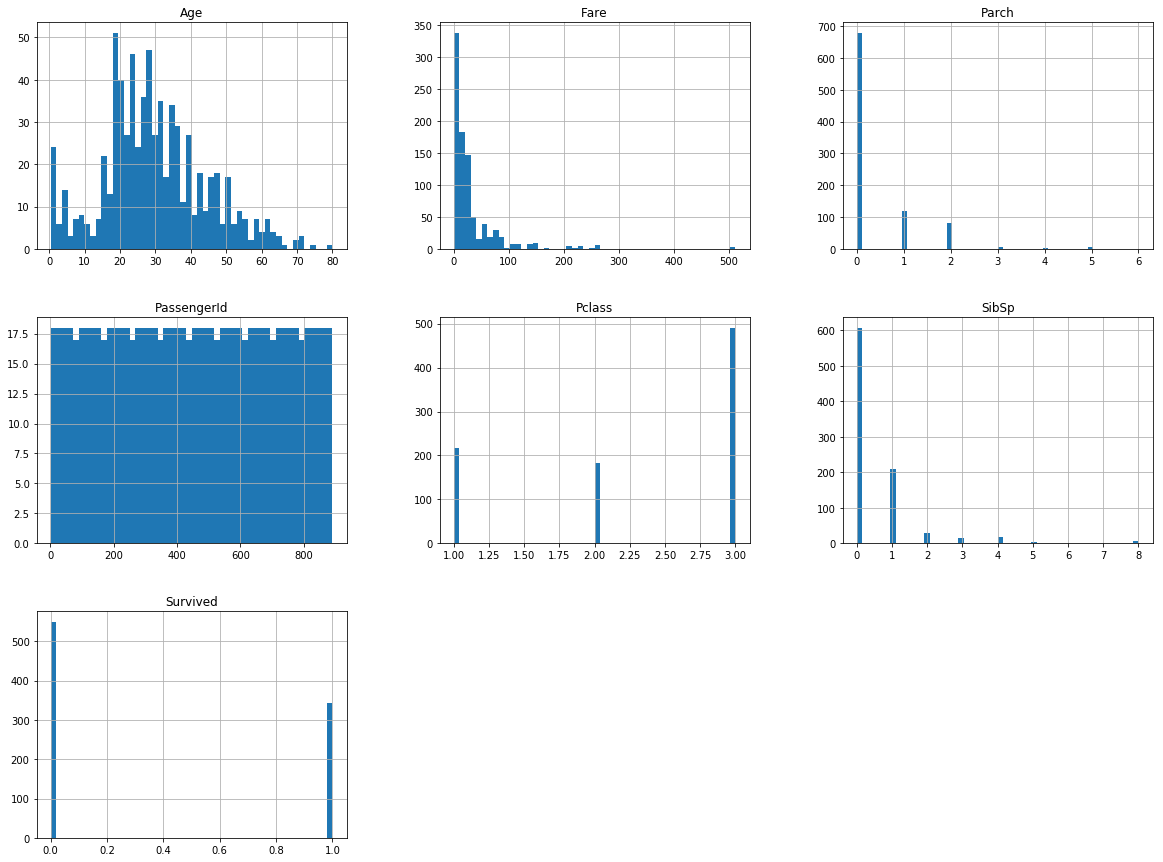

In [60]:
train_df.hist(bins=50, figsize=(20,15))

In [64]:
corr_matrix = train_df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Parch", "Age",
              "Pclass"]
scatter_matrix(train_df[attributes], figsize=(12, 8))

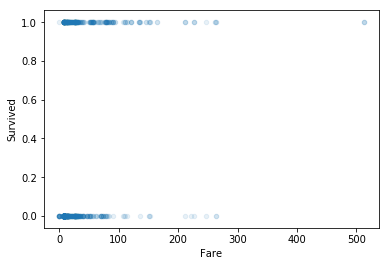

In [111]:
train_df.plot(kind="scatter", x="Fare", y="Survived",
             alpha=0.1)
#plt.axis([0, 16, 0, 550000])

In [5]:
survived_male = train_df[(train_df['Survived']==1) & (train_df['Sex']=='male')]
survived_male.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


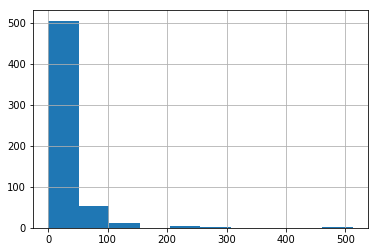

In [135]:
male = train_df[(train_df['Sex']=='male')]
male['Fare'].hist()

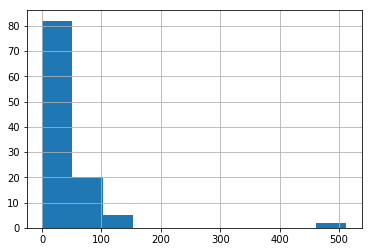

In [131]:
survived_male['Fare'].hist()

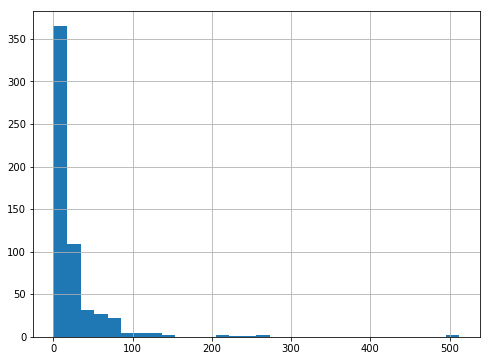

In [142]:
female = train_df[(train_df['Sex']=='female')]
male['Fare'].hist(bins=30, figsize=(8,6))

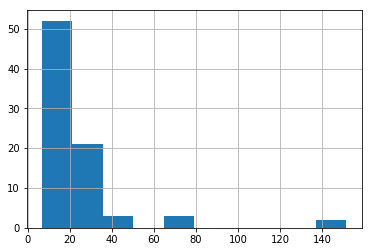

In [137]:
notsurvived_female = train_df[(train_df['Survived']==0) & (train_df['Sex']=='female')]
notsurvived_female['Fare'].hist()

In [97]:
def frequency_table(x):
    return pd.crosstab(train_df[x], train_df["Survived"], margins=True)

f_tabs = {}
for column in ['Pclass', 'Sex', 'Cabin', 'Embarked']:
    ctabs[column]=frequency_table(column)

In [117]:
ctabs['Sex']

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [94]:
def conditional_table(x):
    return pd.crosstab(train_df[x], train_df["Survived"], normalize='index', margins=True)

con_tabs = {}
for column in ['Pclass', 'Sex', 'Cabin', 'Embarked']:
    con_tabs[column]=conditional_table(column)

In [96]:
con_tabs['Sex']

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [143]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Prepare Data

In [144]:
train_df.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [4]:
train_labels = train_df['Survived'].copy()
train = train_df.drop('Survived', axis=1)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
from sklearn.preprocessing import Imputer
num_imputer = Imputer(strategy="median")

In [193]:
train_num_with_id = train.select_dtypes(include=[np.number])

In [194]:
train_num = train_num_with_id.drop('PassengerId', axis=1)

In [195]:
train_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [196]:
train_num_tr = num_imputer.fit_transform(train_num)

In [197]:
train_num_tr = pd.DataFrame(train_num_tr, columns=train_num.columns)
train_num_tr.head()

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500


In [7]:
class CategoricalFillerConst(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value = 'Unknown', put_in_most_frequent = False): # no *args or **kargs
        self.fill_value = fill_value
        self.put_in_most_frequent = put_in_most_frequent
    def fit(self, X, y=None):
        self.most_frequent_values = {}
        for column in X.columns:
            self.most_frequent_values[column] = train_cat[column].value_counts().index[0]
        return self  # nothing else to do
    def transform(self, X, y=None):
        X_tr = X.copy()
        if self.put_in_most_frequent:
            for column in X_tr.columns:
                X_tr.loc[X_tr[column].isnull(), column] = self.most_frequent_values.get(column, 'Unknown')
            return X_tr
        else:
            for column in X_tr.columns:
                if column == 'Embarked':
                    X_tr.loc[X_tr[column].isnull(), column] = self.most_frequent_values.get(column, 'Unknown')
                else:
                    X_tr.loc[X_tr[column].isnull(), column] = self.fill_value
            return X_tr

In [261]:
cat_filler = CategoricalFillerConst()

In [8]:
train_cat_with_name_and_ticket = train.select_dtypes(include=[object])

In [9]:
train_cat = train_cat_with_name_and_ticket.drop(['Name', 'Ticket'], axis = 1)

In [435]:
train_cat.head()

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C85,C
2,female,NaN,S
3,female,C123,S
4,male,NaN,S


In [391]:
cat_filler.fit(train_cat)

CategoricalFillerConst(fill_value='Unknown', put_in_most_frequent=False)

In [392]:
train_cat[train_cat['Embarked'].isnull()]
train_cat[train_cat['Cabin'].isnull()].head()

,Sex,Cabin,Embarked
0,male,NaN,S
2,female,NaN,S
4,male,NaN,S
5,male,NaN,Q
7,male,NaN,S


In [393]:
train_cat_tr = cat_filler.transform(train_cat)

In [434]:
train_cat_tr.isnull().sum()

Sex         0
Cabin       0
Embarked    0
dtype: int64

In [395]:
train_cat_tr[train_cat['Embarked'].isnull()]
#train_cat_tr[train_cat['Cabin'].isnull()].head()

,Sex,Cabin,Embarked
61,female,B28,S
829,female,B28,S


Simplify Cabin feature for One Hot encoding: classify all cabins that appear only once as 'insignificant'.

In [401]:
train_cat_tr['Cabin'].value_counts().head(10)

Unknown          687
Insignificant    101
B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
E101               3
F2                 3
F33                3
C22 C26            3
Name: Cabin, dtype: int64

In [284]:
class CategoricalColumnSimplifier(BaseEstimator, TransformerMixin):
    def __init__(self, columns, significance_threshold = 2): # no *args or **kargs
        self.significance_threshold = significance_threshold
        self.columns = columns
    def fit(self, X, y=None):
        self.significant_values = {}
        for column in self.columns:
            self.significant_values[column] = []
            for index, row in X.iterrows():
                if X[X[column] == X[column][index]].shape[0] >= self.significance_threshold:
                    self.significant_values[column].append(X[column][index])
        return self  # nothing else to do
    def transform(self, X, y=None):
        for column in self.columns:
            X.loc[~X[column].isin(self.significant_values[column]), column] = 'Insignificant'
        return X

In [381]:
simplifier = CategoricalColumnSimplifier(columns = ['Cabin'])

In [396]:
simplifier.fit(train_cat_tr)

CategoricalColumnSimplifier(columns=['Cabin'], insignificance_threshold=1)

In [397]:
train_cat_tr_sig = simplifier.transform(train_cat_tr)

In [398]:
train_cat_tr_sig['Cabin'].value_counts().head(11)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [399]:
train_cat_tr_sig.head(11)

,Sex,Cabin,Embarked
0,male,Unknown,S
1,female,Insignificant,C
2,female,Unknown,S
3,female,C123,S
4,male,Unknown,S
5,male,Unknown,Q
6,male,Insignificant,S
7,male,Unknown,S
8,female,Unknown,S
9,female,Unknown,C


In [11]:
from future_encoders import OneHotEncoder

In [408]:
cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat_tr_sig)
train_cat_1hot

<891x53 sparse matrix of type '<class 'numpy.float64'>'
	with 2673 stored elements in Compressed Sparse Row format>

In [415]:
train_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [411]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['B18', 'B20', 'B22', 'B28', 'B35', 'B49', 'B5', 'B51 B53 B55',
        'B57 B59 B63 B66', 'B58 B60', 'B77', 'B96 B98', 'C123', 'C124',
        'C125', 'C126', 'C2', 'C22 C26', 'C23 C25 C27', 'C52', 'C65',
        'C68', 'C78', 'C83', 'C92', 'C93', 'D', 'D17', 'D20', 'D26', 'D33',
        'D35', 'D36', 'E101', 'E121', 'E24', 'E25', 'E33', 'E44', 'E67',
        'E8', 'F G73', 'F2', 'F33', 'F4', 'G6', 'Insignificant', 'Unknown'],
       dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

Create pipelines

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr[:5]

array([[-1.73010796,  0.82737724, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.72622007, -1.56610693,  0.66386103,  0.43279337, -0.47367361,
         0.78684529],
       [-1.72233219,  0.82737724, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426],
       [-1.71844431, -1.56610693,  0.4333115 ,  0.43279337, -0.47367361,
         0.42073024],
       [-1.71455642,  0.82737724,  0.4333115 , -0.4745452 , -0.47367361,
        -0.48633742]])

In [290]:
cat_pipeline = Pipeline([
        ('nan_filler', CategoricalFillerConst()),
        ('simplifier', CategoricalColumnSimplifier(columns = ['Cabin'])),
        ('onehot', OneHotEncoder()),
    ])

train_cat_tr = cat_pipeline.fit_transform(train_cat)
train_cat_tr.toarray()[:3]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1.]])

In [14]:
from future_encoders import ColumnTransformer

In [291]:
num_attribs = list(train_num)
if 'PassengerId' in num_attribs:
    num_attribs.remove('PassengerId')
cat_attribs = ["Sex", 'Cabin', 'Embarked']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

pip = full_pipeline.fit(train)
train_prepared = pip.transform(train)

In [204]:
num_attribs

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Select and train your model

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(train_prepared, train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [445]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", sgd_clf.predict(some_data_prepared))

Predictions: [0 1 1 1 0]


In [446]:
print("Labels:", list(some_labels))

Labels: [0, 1, 1, 1, 0]


In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf, train_prepared, train_labels, cv=5, scoring="accuracy")
scores

array([0.70391061, 0.76536313, 0.75842697, 0.76404494, 0.78531073])

In [484]:
display_scores(scores)

Scores: [0.70391061 0.76536313 0.75842697 0.76404494 0.78531073]
Mean: 0.7554112775184793
Standard deviation: 0.027309228201208433


In [476]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_prepared, train_labels, cv=5)

from sklearn.metrics import confusion_matrix
print('Confusion matrix: \n ', confusion_matrix(train_labels, y_train_pred))

from sklearn.metrics import precision_score, recall_score
print('\nPrecision score:',precision_score(train_labels, y_train_pred))
print('\nRecall score:',recall_score(train_labels, y_train_pred))

from sklearn.metrics import f1_score
print('\nF1 score:',f1_score(train_labels, y_train_pred))

Confusion matrix: 
  [[447 102]
 [116 226]]

Precision score: 0.6890243902439024

Recall score: 0.6608187134502924

F1 score: 0.6746268656716418


In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(forest_clf, train_prepared, train_labels, cv=10,
                                    scoring="accuracy")
scores

array([0.72222222, 0.72222222, 0.75280899, 0.84269663, 0.86516854,
       0.80898876, 0.84269663, 0.80898876, 0.86516854, 0.86363636])

In [497]:
display_scores(scores)

Scores: [0.72222222 0.72222222 0.75280899 0.84269663 0.86516854 0.80898876
 0.84269663 0.80898876 0.86516854 0.86363636]
Mean: 0.8094597662013392
Standard deviation: 0.05457284037945688


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
scores = cross_val_score(knn_clf, train_prepared, train_labels, cv=10,
                                    scoring="accuracy")
scores

array([0.73333333, 0.78888889, 0.7752809 , 0.82022472, 0.84269663,
       0.83146067, 0.83146067, 0.78651685, 0.79775281, 0.81818182])

In [495]:
display_scores(scores)

Scores: [0.73333333 0.78888889 0.7752809  0.82022472 0.84269663 0.83146067
 0.83146067 0.78651685 0.79775281 0.81818182]
Mean: 0.8025797298831006
Standard deviation: 0.03137100283019147


In [21]:
from sklearn.svm import SVC
svm_clf = SVC()

scores = cross_val_score(svm_clf, train_prepared, train_labels, cv=10,
                                    scoring="accuracy")
scores

array([0.8       , 0.8       , 0.7752809 , 0.84269663, 0.79775281,
       0.7752809 , 0.7752809 , 0.7752809 , 0.84269663, 0.78409091])

In [22]:
display_scores(scores)

Scores: [0.8        0.8        0.7752809  0.84269663 0.79775281 0.7752809
 0.7752809  0.7752809  0.84269663 0.78409091]
Mean: 0.7968360572012257
Standard deviation: 0.02499636740503912


# Fine-tune your model

In [23]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [276]:
param_grid = [
    {'criterion' : ['entropy', 'gini'], 'max_features': [12, 13, 14, 15, 38, 40, 42], 'n_estimators': [15, 16, 17, 18, 19, 23]}, 
]
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True, verbose = 1)
grid_search.fit(train_prepared, train_labels)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:   46.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['entropy', 'gini'], 'max_features': [12, 13, 14, 15, 38, 40, 42], 'n_estimators': [15, 16, 17, 18, 19, 23]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [277]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy', 'max_features': 14, 'n_estimators': 17}

In [275]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8170594837261503 {'criterion': 'entropy', 'max_features': 14, 'n_estimators': 15}
0.8237934904601572 {'criterion': 'entropy', 'max_features': 14, 'n_estimators': 16}
0.8294051627384961 {'criterion': 'entropy', 'max_features': 14, 'n_estimators': 17}
0.8249158249158249 {'criterion': 'entropy', 'max_features': 14, 'n_estimators': 18}
0.8215488215488216 {'criterion': 'entropy', 'max_features': 14, 'n_estimators': 19}
0.8204264870931538 {'criterion': 'entropy', 'max_features': 14, 'n_estimators': 23}
0.8125701459034792 {'criterion': 'entropy', 'max_features': 15, 'n_estimators': 15}
0.813692480359147 {'criterion': 'entropy', 'max_features': 15, 'n_estimators': 16}
0.8159371492704826 {'criterion': 'entropy', 'max_features': 15, 'n_estimators': 17}
0.8237934904601572 {'criterion': 'entropy', 'max_features': 15, 'n_estimators': 18}
0.8215488215488216 {'criterion': 'entropy', 'max_features': 15, 'n_estimators': 19}
0.819304152637486 {'criterion': 'entropy', 'max_features': 15, 'n_estimators'

In [278]:
forest_clf8294 = grid_search.best_estimator_

In [279]:
forest_clf8294

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [280]:
y_pred = forest_clf8294.predict(train_prepared)
accuracy_score(train_labels, y_pred)

0.9775533108866442

In [40]:
prepare_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('forest_clf', RandomForestClassifier())
])

In [80]:
param_grid = [
    {'preparation__cat__simplifier__insignificance_threshold': [1,2], 'preparation__cat__nan_filler__put_in_most_frequent': [False,True], 
     'preparation__num__imputer__strategy' : ['median', 'mean', 'most_frequent']}, 
]

In [ ]:
grid_search_prep = GridSearchCV(prepare_and_predict_pipeline, param_grid, cv=5,
                                scoring='accuracy', return_train_score=True, verbose = 1)
grid_search_prep.fit(train, train_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [223]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [4, 5, 8]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(train_prepared, train_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [4, 5, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [224]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [225]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7957351290684624 {'n_neighbors': 4, 'weights': 'uniform'}
0.7890011223344556 {'n_neighbors': 4, 'weights': 'distance'}
0.8080808080808081 {'n_neighbors': 5, 'weights': 'uniform'}
0.792368125701459 {'n_neighbors': 5, 'weights': 'distance'}
0.7991021324354658 {'n_neighbors': 8, 'weights': 'uniform'}
0.7878787878787878 {'n_neighbors': 8, 'weights': 'distance'}


In [252]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    #{'kernel': ["linear"], 'C': [0.5, 1, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'kernel': ["rbf"], 'C': [0.89, 0.9, 0.91], 'gamma': [0.088,0.09,0.092]},
    #{'kernel': ["poly"], 'C': [20, 35, 50, 70, 100], 'degree': [2, 3, 5], 'coef0' : [0, 0.1, 0.2, 0.5]},
  ]

svm_clf = SVC()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(svm_clf, param_grid, cv=8,
                           scoring='accuracy', verbose = 1)
grid_search.fit(train_prepared, train_labels)

Fitting 8 folds for each of 9 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    3.7s finished


GridSearchCV(cv=8, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.89, 0.9, 0.91], 'gamma': [0.088, 0.09, 0.092]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [253]:
grid_search.best_params_

{'C': 0.89, 'gamma': 0.09, 'kernel': 'rbf'}

In [254]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8271604938271605 {'C': 0.89, 'gamma': 0.088, 'kernel': 'rbf'}
0.8294051627384961 {'C': 0.89, 'gamma': 0.09, 'kernel': 'rbf'}
0.8294051627384961 {'C': 0.89, 'gamma': 0.092, 'kernel': 'rbf'}
0.8271604938271605 {'C': 0.9, 'gamma': 0.088, 'kernel': 'rbf'}
0.8294051627384961 {'C': 0.9, 'gamma': 0.09, 'kernel': 'rbf'}
0.8294051627384961 {'C': 0.9, 'gamma': 0.092, 'kernel': 'rbf'}
0.8271604938271605 {'C': 0.91, 'gamma': 0.088, 'kernel': 'rbf'}
0.8294051627384961 {'C': 0.91, 'gamma': 0.09, 'kernel': 'rbf'}
0.8294051627384961 {'C': 0.91, 'gamma': 0.092, 'kernel': 'rbf'}


In [259]:
svc_clf829

SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [260]:
from sklearn.metrics import accuracy_score

y_pred = svc_clf829.predict(train_prepared)
accuracy_score(train_labels, y_pred)

0.8327721661054994

In [192]:
X_test = load_passenger_data('test.csv')
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [292]:
test_prepared = full_pipeline.transform(X_test)

In [296]:
y_pred_forest8294 = forest_clf8294.predict(test_prepared)

In [311]:
y_pred_forest8294_df = pd.DataFrame({'PassengerID': X_test['PassengerId'], 'Survived': y_pred_forest8294})
y_pred_forest8294_df.head()    

data_path = os.getcwd() + '\\predictions'
csv_path = os.path.join(data_path, 'test_forest8294.csv')
y_pred_forest8294_df.to_csv(csv_path, index = False)                       

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [312]:
y_pred_svc829 = svc_clf829.predict(test_prepared)

In [313]:
y_pred_svc829_df = pd.DataFrame({'PassengerID': X_test['PassengerId'], 'Survived': y_pred_svc829})
y_pred_svc829_df.head()    

data_path = os.getcwd() + '\\predictions'
csv_path = os.path.join(data_path, 'test_svc829.csv')
y_pred_svc829_df.to_csv(csv_path, index = False)                       